In [1]:
from ore_algebra import *

In [2]:
Rx.<x> = QQ['x']
DiffOps.<Dx> = OreAlgebra(Rx, 'Dx')

In [3]:
La = 5*x*(302400*x - 31)*(373248000*x^2 + 216000*x + 1)*Dx^2 + (1354442342400000*x^3 + 64571904000*x^2 - 61473600*x - 31)*Dx + 270888468480000*x^2 - 72292435200*x - 1497300

In [4]:
pretty_print(La)

(564350976000000*x^4 + 268738560000*x^3 - 31968000*x^2 - 155*x)*Dx^2 + (1354442342400000*x^3 + 64571904000*x^2 - 61473600*x - 31)*Dx + 270888468480000*x^2 - 72292435200*x - 1497300

In [5]:
La.local_basis_monomials(0)

[1, x^(4/5)]

In [6]:
La.power_series_solutions(10)

[1 - 48300*x + 7981725900*x^2 - 1469166887370000*x^3 + 282060454768817326875*x^4 - 55452180621311100585562500*x^5 + 11069455396083255274234579312500*x^6 - 2233376392765990444005054441543750000*x^7 + 454163498496007429964118878548085716406250*x^8 + O(x^9)]

Substitute: $t = x/1800$

In [7]:
La2 = 81000000*x*(7*x - 62)*(x^2 + 50*x + 20)*Dx^2 + (1360800000*x^3 + 5605200000*x^2 - 461052000000*x - 20088000000)*Dx + 272160000*x^2 - 6275385000*x - 11229750000

In [8]:
pretty_print(La2)

(567000000*x^4 + 23328000000*x^3 - 239760000000*x^2 - 100440000000*x)*Dx^2 + (1360800000*x^3 + 5605200000*x^2 - 461052000000*x - 20088000000)*Dx + 272160000*x^2 - 6275385000*x - 11229750000

In [9]:
La2.power_series_solutions(10)

[1 - 161/288*x + 26605753/24883200*x^2 - 48972229579/21499084800*x^3 + 50144080847789747/9906778275840000*x^4 - 98581654437886401041/8559456430325760000*x^5 + 19679031815259120487528141/739537035580145664000000*x^6 - 13234823068242906334844767061/212986666247081951232000000*x^7 + 64592142008321056706008018282394413/441649151129949134074675200000000*x^8 + O(x^9)]

In [10]:
lc=81000000*x*(7*x - 62)*(x^2 + 50*x + 20)
lc.complex_roots()

[-49.5967477524977, -0.403252247502313, 0.000000000000000, 8.85714285714286]

## Define paths for analytic continuation

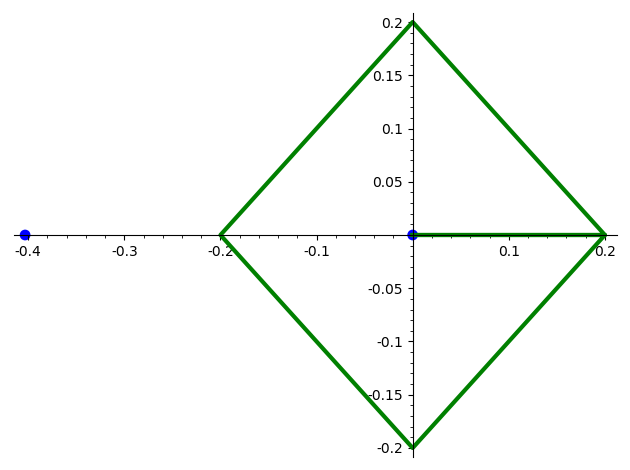

In [11]:
path1 = [0, 1/5, I/5, -1/5, -I/5, 1/5, 0]
point2d([CC(0), CC(-0.40325225)], pointsize=60) + line2d([CC(z) for z in path1], color='green', thickness=3)

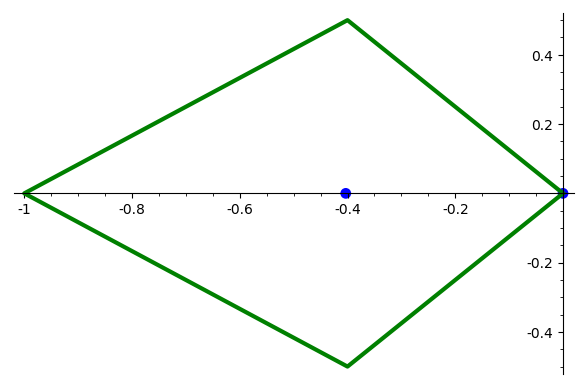

In [12]:
path2 = [0, -2/5+I/2, -1, -2/5-I/2, 0]
point2d([CC(0), CC(-0.40325225)], pointsize=60) + line2d([CC(z) for z in path2], color='green', thickness=3)

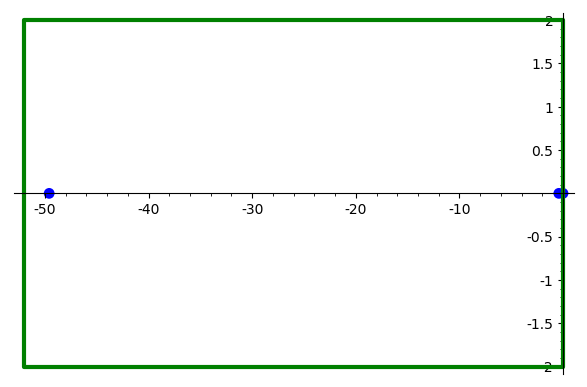

In [13]:
path3 = [0, 2*I, 2*I-52,-2*I-52, -2*I, 0]
point2d([CC(0), CC(-0.40325225),CC(-49.59674775)], pointsize=60) + line2d([CC(z) for z in path3], color='green', thickness=3)

In [14]:
nbits = 20

In [15]:
%time M0 = La2.numerical_transition_matrix(path1, eps=2^(-nbits))
%time M1 = La2.numerical_transition_matrix(path2, eps=2^(-nbits))
%time M2 = La2.numerical_transition_matrix(path3, eps=2^(-nbits))

CPU times: user 296 ms, sys: 0 ns, total: 296 ms
Wall time: 371 ms
CPU times: user 188 ms, sys: 0 ns, total: 188 ms
Wall time: 189 ms
CPU times: user 312 ms, sys: 16 ms, total: 328 ms
Wall time: 326 ms


In [16]:
print("M0 is")
print(M0)
print("\nM1 is")
print(M1)
print("\nM2 is")
print(M2)

M0 is
[            [1.000000 +/- 1.51e-9] + [+/- 1.51e-9]*I                      [+/- 2.94e-9] + [+/- 2.94e-9]*I]
[                     [+/- 2.15e-9] + [+/- 2.15e-9]*I [0.3090170 +/- 9.82e-9] + [-0.9510565 +/- 2.05e-8]*I]

M1 is
[[0.5000000 +/- 5.13e-10] + [0.1624598 +/- 4.87e-8]*I [0.6302914 +/- 3.33e-8] + [-0.8675216 +/- 4.49e-8]*I]
[[0.3966420 +/- 4.67e-8] + [-0.5459308 +/- 1.58e-8]*I  [0.3090170 +/- 8.04e-9] + [0.4253254 +/- 6.59e-9]*I]

M2 is
[[-0.809 +/- 2.74e-4] + [0.588 +/- 4.71e-4]*I              [+/- 2.11e-4] + [+/- 2.11e-4]*I]
[             [+/- 6.82e-4] + [+/- 6.82e-4]*I  [0.309 +/- 5.77e-4] + [0.951 +/- 6.17e-4]*I]


In [17]:
ℂfp = ComplexField(nbits)
M0fp = M0.change_ring(ℂfp)
M0fp

[    1.0000 + 1.0069e-12*I 1.0900e-12 - 3.3205e-12*I]
[1.9016e-12 + 5.3599e-12*I       0.30902 - 0.95106*I]

In [18]:
nbits = 800 #(240 decimal places)

In [19]:
%time M0 = La2.numerical_transition_matrix(path1, eps=2^(-nbits))
%time M1 = La2.numerical_transition_matrix(path2, eps=2^(-nbits))
%time M2 = La2.numerical_transition_matrix(path3, eps=2^(-nbits))

CPU times: user 1.09 s, sys: 0 ns, total: 1.09 s
Wall time: 1.1 s
CPU times: user 1.08 s, sys: 0 ns, total: 1.08 s
Wall time: 1.08 s
CPU times: user 1.89 s, sys: 0 ns, total: 1.89 s
Wall time: 1.88 s


In [20]:
ℂfp = ComplexField(nbits)
M0fp = M0.change_ring(ℂfp)
M1fp = M1.change_ring(ℂfp)
M2fp = M2.change_ring(ℂfp)

In [21]:
def key(v):
    scale = 10^10
    re = list(ZZ((c*scale+1/2).real().floor()) for c in v)
    re = re + list(ZZ(((c*scale).imag()+1/2).floor()) for c in v)
    return tuple(re)

In [22]:
La2.local_basis_monomials(0)

[1, x^(4/5)]

In [23]:
u = vector(ℂfp, [1,0])
known = set()

roundvals = [key(u)] 
todoold = [u]
todonew = [u]

count = 0
oldlen = 1

while len(todonew)>0:
    todonew = todoold
    todoold = []
    for vc in todonew:
        count = count+1
        if count%1000 == 0:
            print(count, len(roundvals),len(roundvals)-oldlen)
            oldlen = len(roundvals)

        vcM0 = M0fp*vc
        k = key(vcM0)
        if k in roundvals:
            pass
        else:
            roundvals.append(k)
            todoold.append(vcM0)
            
        vcM1 = M1fp*vc
        k = key(vcM1)
        if k in roundvals:
            pass
        else:
            roundvals.append(k)
            todoold.append(vcM1)
            
        vcM2 = M2fp*vc
        k = key(vcM2)
        if k in roundvals:
            pass
        else:
            roundvals.append(k)
            todoold.append(vcM2)

        
len(roundvals)

120

# Bonus: $\sum_{n\geq0} h_n x^n$ (orbit size 46080)

In [38]:
Lh = (10623571200000000*x^6 + 532263312000000000*x^5 + 266709024000000000*x^4 + 21695040000000000*x^3)*Dx^4 + (112609854720000000*x^5 + 3783950899200000000*x^4 + 1204221686400000000*x^3 + 99797184000000000*x^2)*Dx^3 + (299366334432000000*x^4 + 5572619914320000000*x^3 + 1116616609440000000*x^2 + 72895334400000000*x)*Dx^2 + (188941984387200000*x^3 + 1155098746512000000*x^2 + 265352930424000000*x + 2082723840000000)*Dx + 11299939386120000*x^2 - 943325592300000*x + 957448485000000

In [39]:
%time M0 = Lh.numerical_transition_matrix(path1, eps=2^(-nbits))
%time M1 = Lh.numerical_transition_matrix(path2, eps=2^(-nbits))
%time M2 = Lh.numerical_transition_matrix(path3, eps=2^(-nbits))

CPU times: user 3.94 s, sys: 0 ns, total: 3.94 s
Wall time: 3.93 s
CPU times: user 5.3 s, sys: 0 ns, total: 5.3 s
Wall time: 5.3 s
CPU times: user 6.19 s, sys: 0 ns, total: 6.19 s
Wall time: 6.19 s


In [40]:
ℂfp = ComplexField(nbits)
M0fp = M0.change_ring(ℂfp)
M1fp = M1.change_ring(ℂfp)
M2fp = M2.change_ring(ℂfp)

In [41]:
Lh.local_basis_monomials(0)

[1, x^(1/5), x^(2/5), x^(4/5)]

In [42]:
u = vector(ℂfp, [1,0,0,0])
known = set()

roundvals = [key(u)] 
todoold = [u]
todonew = [u]

count=0
oldlen = 1

while len(todonew)>0:
    todonew = todoold
    todoold = []
    for vc in todonew:
        count = count+1
        if count%1000 == 0:
            print(count, len(roundvals),len(roundvals)-oldlen)
            oldlen = len(roundvals)

        vcM0 = M0fp*vc
        k = key(vcM0)
        if k in roundvals:
            pass
        else:
            roundvals.append(k)
            todoold.append(vcM0)
            timeslc = 0
            
        vcM1 = M1fp*vc
        k = key(vcM1)
        if k in roundvals:
            pass
        else:
            roundvals.append(k)
            todoold.append(vcM1)
            timeslc = 0
            
        vcM2 = M2fp*vc
        k = key(vcM2)
        if k in roundvals:
            pass
        else:
            roundvals.append(k)
            todoold.append(vcM2)
            timeslc = 0

        
len(roundvals)

1000 2301 2300
2000 4217 1916
3000 5991 1774
4000 7639 1648
5000 9282 1643
6000 10833 1551
7000 12293 1460
8000 13700 1407
9000 15077 1377
10000 16421 1344
11000 17647 1226
12000 18987 1340
13000 20158 1171
14000 21320 1162
15000 22596 1276
16000 23724 1128
17000 24865 1141
18000 26001 1136
19000 27141 1140
20000 28193 1052
21000 29212 1019
22000 30244 1032
23000 31274 1030
24000 32229 955
25000 33214 985
26000 34152 938
27000 35055 903
28000 35899 844
29000 36715 816
30000 37556 841
31000 38402 846
32000 39097 695
33000 39784 687
34000 40412 628
35000 41091 679
36000 41823 732
37000 42460 637
38000 42997 537
39000 43521 524
40000 44030 509
41000 44571 541
42000 45036 465
43000 45368 332
44000 45699 331
45000 45968 269
46000 46080 112


46080